# 使用magrittr进行管道操作

这一章介绍的很简单，主要是几种管道操作符

In [1]:
# 加载magrittr包，其提供了多种管道
library(magrittr)

In [2]:
# R是如何管理数据的，添加新的列
diamonds <- ggplot2::diamonds
diamonds2 <- diamonds %>% dplyr::mutate(price_per_carat = price / carat)

In [3]:
# 看两个数据框大小
# pryr提供的函数显示占用内存大小
pryr::object_size(diamonds)
pryr::object_size(diamonds2)
pryr::object_size(diamonds, diamonds2)

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp


3.46 MB

3.89 MB

3.89 MB

In [4]:
# 从上面可以看到R在共享数据列
# 再改变一列共用列比较大小
diamonds$carat[1] <- NA
pryr::object_size(diamonds)
pryr::object_size(diamonds2)
pryr::object_size(diamonds, diamonds2)

3.46 MB

3.89 MB

4.32 MB

管道的原理作者也介绍了，前面也用过很多次“%>%”管道，不再写了，有些情况是不适合使用管道的，看书

## T操作符"%T>%"

T操作符和管道是很像的，不过它返回的是左侧项，对比下面的例子就明白了

 NULL


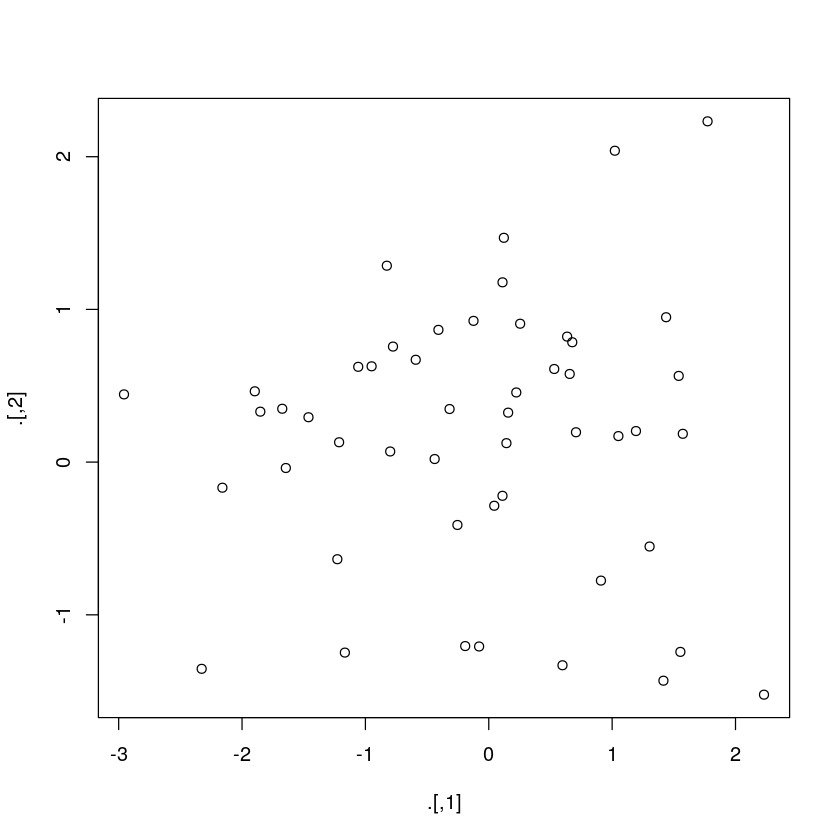

In [5]:
# 管道操作符返回为NULL
rnorm(100) %>% matrix(ncol = 2) %>% plot() %>% str()

 num [1:50, 1:2] -0.14 -1.561 1.082 0.59 -0.234 ...


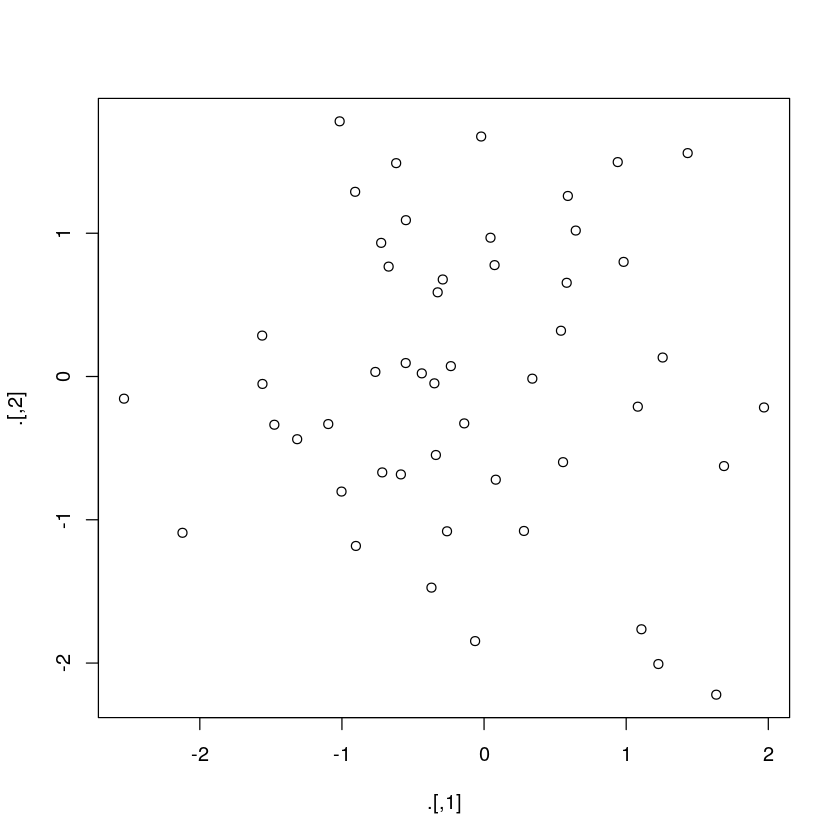

In [6]:
# T操作符返回数据类型
rnorm(100) %>% matrix(ncol = 2) %T>% plot() %>% str()

## 爆炸操作符"%$%"

爆炸操作符适用于函数是基于向量而非数据框的情况，感觉和attach()函数与with()函数将数据框加载到内存中，直接使用数据框中每列的列名像，不过更简洁

In [7]:
mtcars %>% head()
# 查看数据

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [8]:
mtcars %$% cor(disp, mpg)

[1] -0.8475514

In [9]:
attach(mtcars)
cor(disp, mpg)
detach(mtcars)

[1] -0.8475514

In [10]:
with(mtcars,cor(disp, mpg))

[1] -0.8475514

能看出来它们三个实现的功能是一样的，爆炸操作符更爽